## It is a proof on basis RNN with oscillator system

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Generate sine wave data
def generate_data(seq_length, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        x = np.linspace(i * 2 * np.pi, (i + 1) * 2 * np.pi, seq_length + 1)
        sine_wave = np.sin(x)
        X.append(sine_wave[:-1])  # input sequence
        y.append(sine_wave[1:])   # target sequence
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000
X, y = generate_data(seq_length, num_samples)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

print(X.shape, y.shape)  # Output: (1000, 50), (1000, 50)

torch.Size([1000, 50]) torch.Size([1000, 50])


In [29]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

input_size = 1
hidden_size = 20
output_size = 1
model = SimpleRNN(input_size, hidden_size, output_size)

In [30]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# X=X[0:500]
# y = y[0:500]
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X.unsqueeze(2))  # Add a dimension for input size
    loss = criterion(outputs, y.unsqueeze(2))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.4491
Epoch [20/100], Loss: 0.3484
Epoch [30/100], Loss: 0.2575
Epoch [40/100], Loss: 0.1578
Epoch [50/100], Loss: 0.0782
Epoch [60/100], Loss: 0.0598
Epoch [70/100], Loss: 0.0413
Epoch [80/100], Loss: 0.0312
Epoch [90/100], Loss: 0.0221
Epoch [100/100], Loss: 0.0150


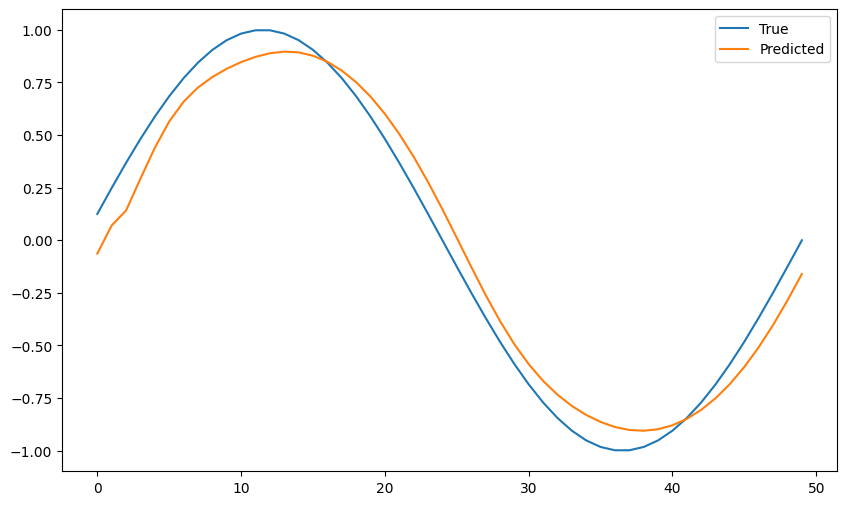

In [31]:
# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(X.unsqueeze(2)).squeeze(2).numpy()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y[0].numpy(), label='True')
plt.plot(predictions[0], label='Predicted')
plt.legend()
plt.show()